<H4>Consider the student performance dataset. Predict the student performance as “Pass” or “Fail” by
implementing a decision tree. Perform data preprocessing and visualize the data. Identify the
important feature affecting the student performance and analyze the efficiency of the decision tree
using different metrics. Plot the decision tree.</H4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import *

In [2]:
df = pd.read_csv('Dataset/student_performance_new.csv')

In [3]:
df.head(10)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1
5,6,1RV21MC022,BHAKTHI PRABHU,27,33,22,27.333333,1,6.5,4.0,10.0,16.5,1,43.833333,14,14,1,0
6,7,1RV21MC025,BHAT DIVYA SUBRAHMANYA,32,45,28,35.000000,1,7.5,8.0,7.0,15.0,1,50.000000,15,15,1,0
7,8,1RV21MC027,CHANDAN B REDDY,12,22,17,17.000000,0,6.0,5.0,10.0,16.0,1,33.000000,13,14,1,1
8,9,1RV21MC029,CHANDANA M,20,33,20,24.333333,0,5.0,4.0,8.0,13.0,1,37.333333,14,14,1,1
9,10,1RV21MC031,D S HARSHITHA,22,30,18,23.333333,0,3.5,5.0,10.0,15.0,1,38.333333,14,14,1,1


In [9]:
df.rename(columns={'Unnamed: 15': 'Assignment2'}, inplace=True)


In [10]:
df.head()

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Assignment2,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.000000,1,4.0,6.0,10.0,16.0,1,45.000000,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.000000,1,6.5,6.0,9.0,15.5,1,45.500000,14,13,1,1
2,3,1RV21MC009,AKASH E PUNAGIN,28,36,22,28.666667,1,7.0,5.0,NaN,12.0,1,40.666667,14,13,1,1
3,4,1RV21MC011,AMIT KUMAR,16,28,32,25.333333,1,3.0,2.0,10.0,13.0,1,38.333333,13,13,1,1
4,5,1RV21MC012,ANANDGOUDA PATIL,25,42,27,31.333333,1,6.0,5.0,10.0,16.0,1,47.333333,13,14,1,1


In [11]:
df.isna().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Assignment2           0
Assignment Result     0
Result                0
dtype: int64

In [18]:
df = df.dropna()

In [17]:
x = df

(53, 18)

In [51]:
#feature selection
x = df[['Test Total ','Quiz','Assignment ','Assignment2']]
y =df['Result']

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=15)

In [53]:
#create model and train data
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [54]:
predict = model.predict(xtest)

In [55]:
#model purity/accuracy
model.score(xtrain,ytrain)

0.9047619047619048

In [56]:
#model accuracy on test data
print("Accuracy=",accuracy_score(ytest,predict))
print("Precision=",precision_score(ytest,predict))
print("Recall Score=",recall_score(ytest,predict))
print("F1 Score=",f1_score(ytest,predict)) 

Accuracy= 1.0
Precision= 1.0
Recall Score= 1.0
F1 Score= 1.0


<Axes: >

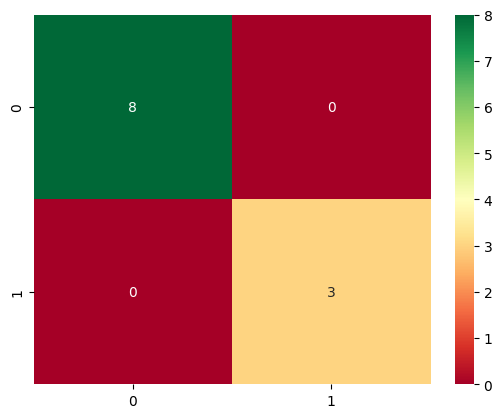

In [57]:
#confusion matrix on test data 
confmattest=confusion_matrix(ytest,predict)
sns.heatmap(confmattest,cmap='RdYlGn',annot=True)

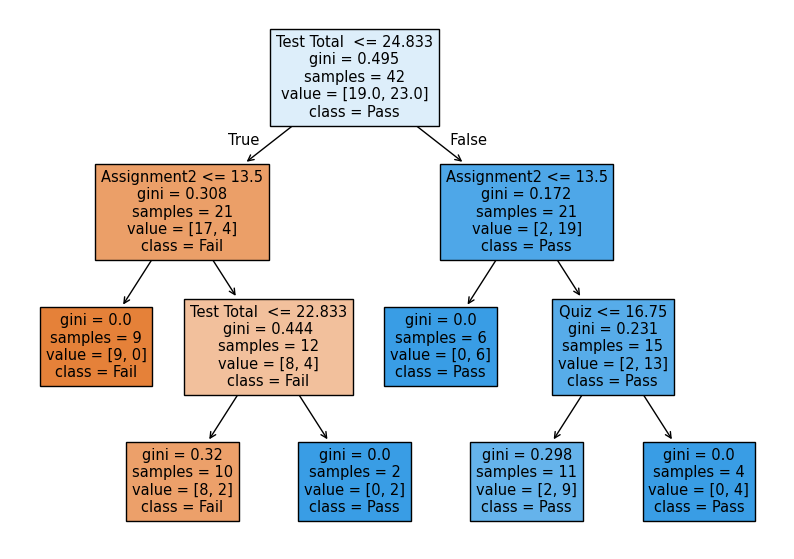

In [58]:
#plot decision tree on test data
plt.figure(figsize=(10, 7))
a = tree.plot_tree(model, feature_names=list(x.columns), filled=True, class_names=['Fail','Pass'])
plt.show()

In [59]:
# tesing with custom data
Input = [[33,7,13,15]]
Result = model.predict(Input)
if Result == 0:
    print('Fail')
else:
    print('Pass')

Pass


C:\Users\mdjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
